<a href="https://colab.research.google.com/github/ovitalukder00761/DIP_LAB1/blob/main/2019331548_DIP_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install kaggle

In [8]:
!pip install opencv-python-headless matplotlib
!pip install opencv-python-headless matplotlib requests




In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from io import BytesIO



In [25]:
def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [27]:
def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        image = np.array(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if image is None:
            raise ValueError(f"Error decoding image from URL: {url}")
        return image
    except Exception as e:
        print(f"Failed to download image from {url}: {e}")
        return None


url1 = "https://images.unsplash.com/photo-1547721064-da6cfb341d50"
url2 = "https://images.unsplash.com/photo-1547721064-da6cfb341d50"

image1 = download_image(url1)
image2 = download_image(url2)


if image1 is None or image2 is None:
    print("One or both images failed to download. Please check the URLs.")
else:
    image2_noisy = cv2.add(image2, np.random.randn(*image2.shape).astype(np.uint8) * 25)
    image2_noisy_resized = cv2.resize(image2_noisy, (image1.shape[1], image1.shape[0]))


In [28]:
def noise_reduction(image):
        blurred = cv2.GaussianBlur(image, (5, 5), 0)
        return cv2.addWeighted(image, 0.5, blurred, 0.5, 0)

In [29]:
def change_detection(image1, image2):
        return cv2.absdiff(image1, image2)


In [30]:
def apply_mask(image, mask):
        mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        return cv2.multiply(image, mask)

In [33]:
    mask = np.zeros(image1.shape[:2], dtype="uint8")
    cv2.rectangle(mask, (50, 50), (300, 300), 255, -1)


    mask_binary = mask // 255


    noise_reduced_image = noise_reduction(image1)
    change_detected_image = change_detection(image1, image2_noisy_resized)
    masked_image = apply_mask(image1, mask_binary)

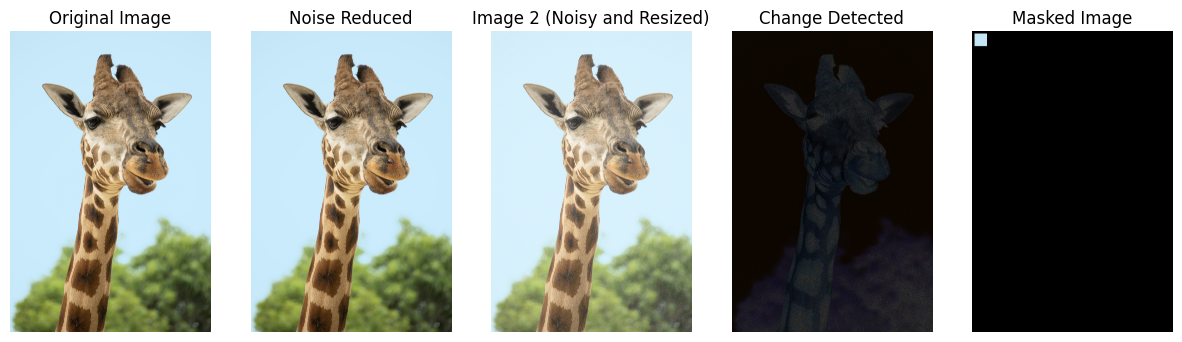

In [35]:
 display_images(
        [image1, noise_reduced_image, image2_noisy_resized, change_detected_image, masked_image],
        ['Original Image', 'Noise Reduced', 'Image 2 (Noisy and Resized)', 'Change Detected', 'Masked Image']
    )